[Reference](https://medium.com/@amit25173/what-is-a-t-test-and-when-to-use-it-in-pandas-9fde303d3c9f)

# 1. One-Sample t-test

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Generate random heights (mean = 172, std = 5)
data = pd.DataFrame({'heights': np.random.normal(loc=172, scale=5, size=30)})

# Perform one-sample t-test against population mean of 170
t_stat, p_value = stats.ttest_1samp(data['heights'], 170)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.1653008495694165, P-value: 0.8698541293440403


# 2. Two-Sample (Independent) t-test

In [2]:
# Generate sample data
farm_a = np.random.normal(loc=150, scale=10, size=30)  # Avg 150g
farm_b = np.random.normal(loc=155, scale=12, size=30)  # Avg 155g

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(farm_a, farm_b)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.268539598839019, P-value: 0.02703449236864183


# 3. Paired t-test

In [3]:
# Create before and after reaction times
before = np.random.normal(loc=250, scale=30, size=30)  # Initial reaction time (ms)
after = before - np.random.normal(loc=15, scale=10, size=30)  # Expected improvement

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 6.644941421092007, P-value: 2.760927868545841e-07


# How to Perform a t-test in Pandas (Step-by-Step Guide)


## 1) One-Sample t-test (Compare a sample mean to a known value)

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Generate sample data (espresso caffeine levels)
data = pd.DataFrame({'caffeine_mg': np.random.normal(loc=50, scale=10, size=30)})

print(data.head())  # Preview the data

   caffeine_mg
0    34.583903
1    48.541065
2    59.832952
3    47.945545
4    44.939391


In [5]:
# Perform one-sample t-test (testing if mean is 50)
t_stat, p_value = stats.ttest_1samp(data['caffeine_mg'], 50)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.7593222528425991, P-value: 0.45378816265855093


## 2) Independent Two-Sample t-test (Compare means of two groups)

In [6]:
# Generate sample data
old_machine = np.random.normal(loc=50, scale=10, size=30)  # Old espresso machine
new_machine = np.random.normal(loc=55, scale=12, size=30)  # New espresso machine

# Convert to Pandas DataFrame
espresso_data = pd.DataFrame({'Old Machine': old_machine, 'New Machine': new_machine})

print(espresso_data.head())  # Preview data

   Old Machine  New Machine
0    41.570022    62.917461
1    44.705279    58.425340
2    57.125574    37.266476
3    62.469728    53.577511
4    20.646835    68.295671


In [8]:
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(old_machine, new_machine)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.6049524731775158, P-value: 0.11393608483127382


## 3) Perform independent t-test

In [9]:
# Generate sample data
before_scores = np.random.normal(loc=70, scale=10, size=30)  # Pre-training scores
after_scores = before_scores + np.random.normal(loc=5, scale=5, size=30)  # Post-training improvement

# Convert to Pandas DataFrame
scores_data = pd.DataFrame({'Before Training': before_scores, 'After Training': after_scores})

print(scores_data.head())  # Preview data

   Before Training  After Training
0        71.419282       80.494157
1        69.212194       71.822777
2        65.914100       69.792141
3        79.712631       89.030549
4        67.713720       73.809358


In [10]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(before_scores, after_scores)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -6.863422558357479, P-value: 1.538367302063487e-07


## Shapiro-Wilk Test

In [12]:
from scipy.stats import shapiro

# Assume 'data' contains our sample values
stat, p = shapiro(data['caffeine_mg'])

print(f"Shapiro-Wilk test statistic: {stat}, P-value: {p}")

Shapiro-Wilk test statistic: 0.9688659296323879, P-value: 0.5086293740135761


## QQ Plot (Visual Approach)

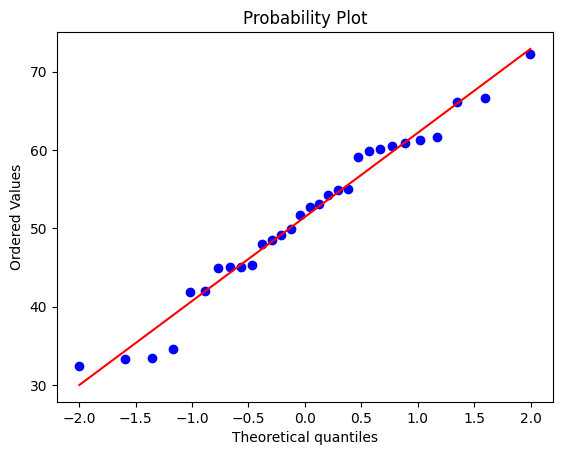

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot
stats.probplot(data['caffeine_mg'], dist="norm", plot=plt)
plt.show()

## Mann-Whitney U test (For Two Independent Groups)

In [15]:
from scipy.stats import mannwhitneyu

# Compare two non-normally distributed groups
stat, p = mannwhitneyu(old_machine, new_machine)

print(f"Mann-Whitney U test statistic: {stat}, P-value: {p}")

Mann-Whitney U test statistic: 354.0, P-value: 0.1579756891505133
